In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import glob
#from netCDF4 import Dataset

In [2]:
filesindir = []
for i, file in enumerate(glob.glob('./input/*')):
    filesindir.append(file)
    print(i, file)
#print(filesindir)

0 ./input\19x37.png
1 ./input\20x37.png
2 ./input\8x75.png
3 ./input\POL_f3_on_POL_f0.txt
4 ./input\RAM12x75_f2_on_POL_f0.txt
5 ./input\RAM12x75_f3_on_POL_f0.txt
6 ./input\RAM14x75_f3_on_POL_f0.txt
7 ./input\RAM14x75_f4_on_POL_f0.txt
8 ./input\RAM16x75_f4_on_POL_f0.txt
9 ./input\RAM16x75_f5_on_POL_f0.txt
10 ./input\RAM17_f3_on_POL_f0.txt
11 ./input\RAM17_fanf3_on_POL_f0.txt
12 ./input\RAM19_f2_on_POL_f0.txt
13 ./input\RAM19_f2_on_POL_f0f1_comb.txt
14 ./input\RAM19_f2_on_POL_f0_comb.txt
15 ./input\RAM19_f3_on_POL_f0.txt
16 ./input\RAM19_f3_on_POL_f0comb.txt
17 ./input\RAM19_f3_on_RAM19_f0.txt
18 ./input\RAM19_f4_on_POL_f0.A1X
19 ./input\RAM19_f4_on_POL_f0.txt
20 ./input\RAM19_fanf2_on_POL_f0.txt
21 ./input\RAM19_fanf4_on_POL_f0.txt
22 ./input\REF_f2_on_POL_f0.txt


In [3]:
def readtodataframe(file, scenario):
    path = './input/'
    filename = path + file + '.txt'
    column_names = ['BasShotNo', 'MonShotNo', 'BasRecvNo', 'MonRecvNo', 'OffsDiff', 'AzimDiff', 'CMPDist', 'CMPInDist', 'CMPCrDist', 'SouDist', 'SouInDist', 'SouCrDist', 'RecDist', 'RecInDist', 'RecCrDist', 'SouRecDist']
    rowstoskip = 2
    df_raw = pd.read_csv(filename, names=column_names, skiprows=rowstoskip, delim_whitespace=True)
    df_raw['Scenario'] = scenario
    return df_raw

In [4]:
'''
df_raw_POL_f3_on_POL_f0 = readtodataframe('POL_f3_on_POL_f0', '8x75m on 8x75m')
df_raw_RAM19_f3_on_POL_f0 = readtodataframe('RAM19_f3_on_POL_f0', '19x37.5m on 8x75m')
df_raw_RAM19_f3_on_POL_f0comb = readtodataframe('RAM19_f3_on_POL_f0comb', '19x37.5m on 8x75m inc interleaved')
df_raw_RAM19_f3_on_RAM19_f0 = readtodataframe('RAM19_f3_on_RAM19_f0', '19x37.5m on 19x37.5m')
df_raw_RAM17_f3_on_POL_f0 = readtodataframe('RAM17_f3_on_POL_f0', '17x37.5m on 8x75m')
df_raw_RAM17_fanf3_on_POL_f0 = readtodataframe('RAM17_fanf3_on_POL_f0', '17x37.5m with fan on 8x75m')
'''

"\ndf_raw_POL_f3_on_POL_f0 = readtodataframe('POL_f3_on_POL_f0', '8x75m on 8x75m')\ndf_raw_RAM19_f3_on_POL_f0 = readtodataframe('RAM19_f3_on_POL_f0', '19x37.5m on 8x75m')\ndf_raw_RAM19_f3_on_POL_f0comb = readtodataframe('RAM19_f3_on_POL_f0comb', '19x37.5m on 8x75m inc interleaved')\ndf_raw_RAM19_f3_on_RAM19_f0 = readtodataframe('RAM19_f3_on_RAM19_f0', '19x37.5m on 19x37.5m')\ndf_raw_RAM17_f3_on_POL_f0 = readtodataframe('RAM17_f3_on_POL_f0', '17x37.5m on 8x75m')\ndf_raw_RAM17_fanf3_on_POL_f0 = readtodataframe('RAM17_fanf3_on_POL_f0', '17x37.5m with fan on 8x75m')\n"

In [9]:
#df_1 = readtodataframe('POL_f3_on_POL_f0', '8x75m - 3deg on 8x75m')
df_1 = readtodataframe('REF_f2_on_POL_f0', '10x75.5m - 2deg on 8x75m')
df_2 = readtodataframe('RAM12x75_f2_on_POL_f0', '12x75m - 2deg on 8x75m')
#df_3 = readtodataframe('RAM12x75_f3_on_POL_f0', '12x75m - 3deg on 8x75m')
#df_4 = readtodataframe('RAM14x75_f3_on_POL_f0', '14x75m - 3deg on 8x75m')
#df_5 = readtodataframe('RAM16x75_f4_on_POL_f0', '16x75m - 4deg on 8x75m')
#df_6 = readtodataframe('RAM19_f3_on_POL_f0', '19x37.5m - 3deg on 8x75m')
df_3 = readtodataframe('RAM19_f2_on_POL_f0', '19x37.5m - 2deg on 8x75m')
#df_5 = readtodataframe('RAM19_f3_on_POL_f0', '19x37.5m - 3deg on 8x75m')
df_4 = readtodataframe('RAM19_f4_on_POL_f0', '19x37.5m - 4deg on 8x75m')
df_5 = readtodataframe('RAM19_fanf2_on_POL_f0', '19x37.5m - 150% Fanning - 2deg on 8x75m')
df_6 = readtodataframe('RAM19_fanf4_on_POL_f0', '19x37.5m - 150% Fanning - 4deg on 8x75m')

In [10]:
'''#df_1 = readtodataframe('POL_f3_on_POL_f0', '8x75m - 3deg on 8x75m')
df_1 = readtodataframe('REF_f2_on_POL_f0', '10x75.5m - 2deg on 8x75m')
df_2 = readtodataframe('RAM12x75_f2_on_POL_f0', '12x75m - 2deg on 8x75m')
df_3 = readtodataframe('RAM12x75_f3_on_POL_f0', '12x75m - 3deg on 8x75m')
df_4 = readtodataframe('RAM14x75_f3_on_POL_f0', '14x75m - 3deg on 8x75m')
df_5 = readtodataframe('RAM14x75_f4_on_POL_f0', '14x75m - 4deg on 8x75m')
df_6 = readtodataframe('RAM16x75_f4_on_POL_f0', '16x75m - 4deg on 8x75m')
'''

"#df_1 = readtodataframe('POL_f3_on_POL_f0', '8x75m - 3deg on 8x75m')\ndf_1 = readtodataframe('REF_f2_on_POL_f0', '10x75.5m - 2deg on 8x75m')\ndf_2 = readtodataframe('RAM12x75_f2_on_POL_f0', '12x75m - 2deg on 8x75m')\ndf_3 = readtodataframe('RAM12x75_f3_on_POL_f0', '12x75m - 3deg on 8x75m')\ndf_4 = readtodataframe('RAM14x75_f3_on_POL_f0', '14x75m - 3deg on 8x75m')\ndf_5 = readtodataframe('RAM14x75_f4_on_POL_f0', '14x75m - 4deg on 8x75m')\ndf_6 = readtodataframe('RAM16x75_f4_on_POL_f0', '16x75m - 4deg on 8x75m')\n"

In [11]:
def offset_split(df, channo):
    df['Channel Range'] = df['BasRecvNo'].apply(lambda x: '< '+str(channo) if ((x % 408 < channo) & (x % 408 > 0)) else '> '+str(channo))
    return df
    

In [13]:
df_1 = offset_split(df_1, 100)
df_2 = offset_split(df_2, 100)
df_3 = offset_split(df_3, 100)
df_4 = offset_split(df_4, 100)
df_5 = offset_split(df_5, 100)
df_6 = offset_split(df_6, 100)

In [14]:
df_1.replace(-999.25, np.nan, inplace=True)
df_2.replace(-999.25, np.nan, inplace=True)
df_3.replace(-999.25, np.nan, inplace=True) 
df_4.replace(-999.25, np.nan, inplace=True)
df_5.replace(-999.25, np.nan, inplace=True) 
df_6.replace(-999.25, np.nan, inplace=True) 

In [15]:
df_combined = pd.concat([df_1, 
                         df_2, 
                         df_3, 
                         df_4, 
                         df_5,
                         df_6,])

In [36]:
def plot_dist(df, attrib, maxval, title, plttype='violin'):
    sns.set_style("darkgrid")
    sns.set_context('poster')
    sns.set_palette('Paired')
    plt.figure(figsize=(20,16))
    plt.title(title)
    plt.xticks(rotation=20)
    plt.gca().invert_yaxis()
    plt.ylim(maxval, -maxval/20)
    if plttype == 'violin':
        #sns.violinplot(data=df[df[attrib] <= maxval], x='Scenario', y=attrib, hue='Channel Range', split=True, cut=0, scale='count')
        #sns.violinplot(data=df[df[attrib] <= maxval], x='Scenario', y=attrib, split=True, cut=0, scale='count')
        sns.violinplot(data=df, x='Scenario', y=attrib, hue='Channel Range', split=True, cut=0, scale='count')
    else:
        sns.boxplot(data=df, x='Scenario', y=attrib)#, hue='Channel Range')

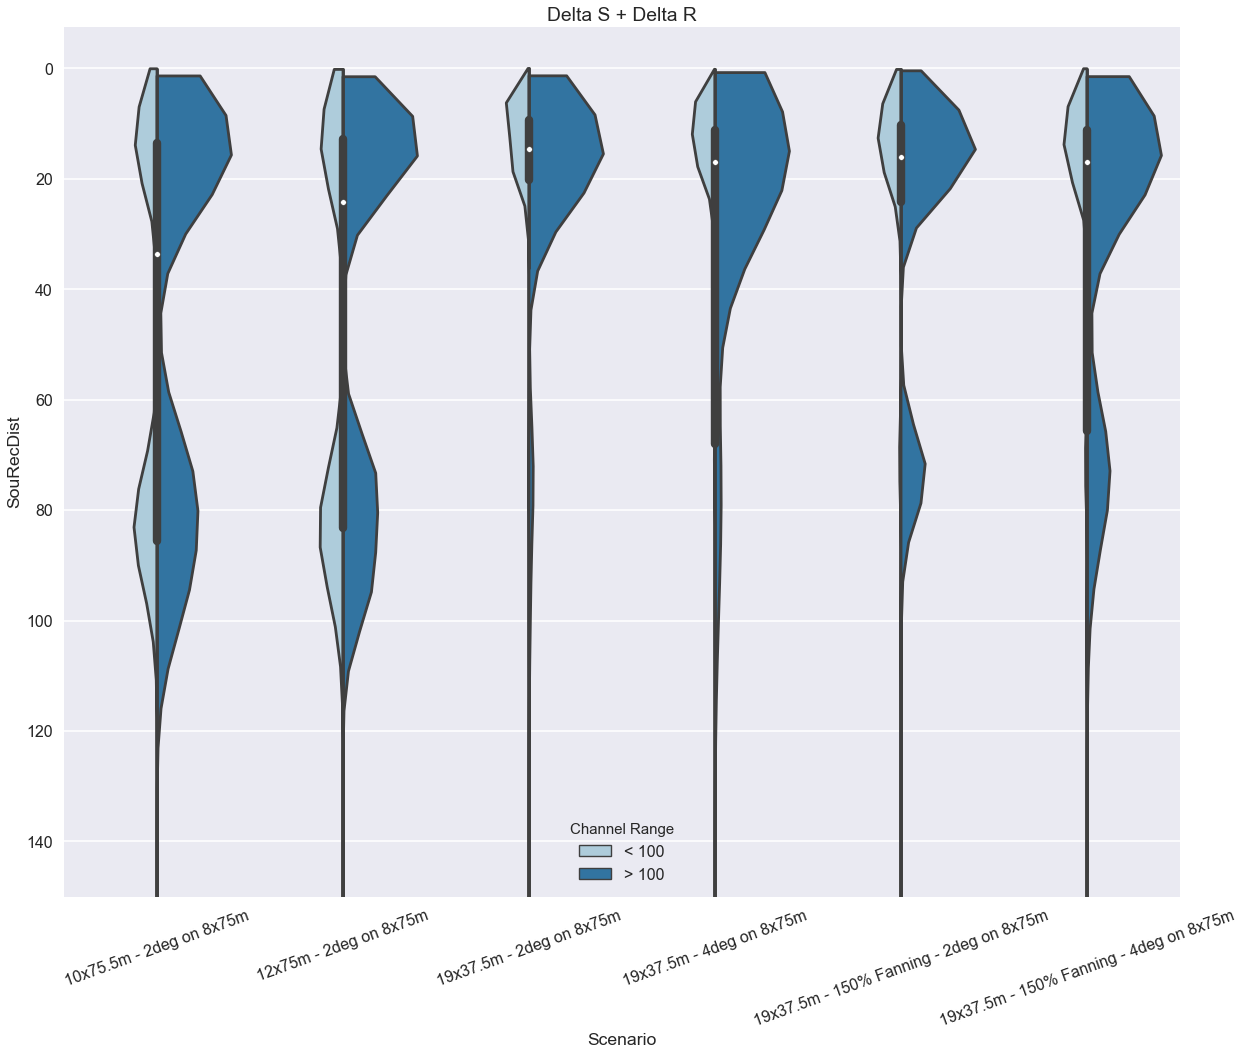

In [17]:
plot_dist(df_combined, 'SouRecDist', 150, 'Delta S + Delta R', plttype='violin')

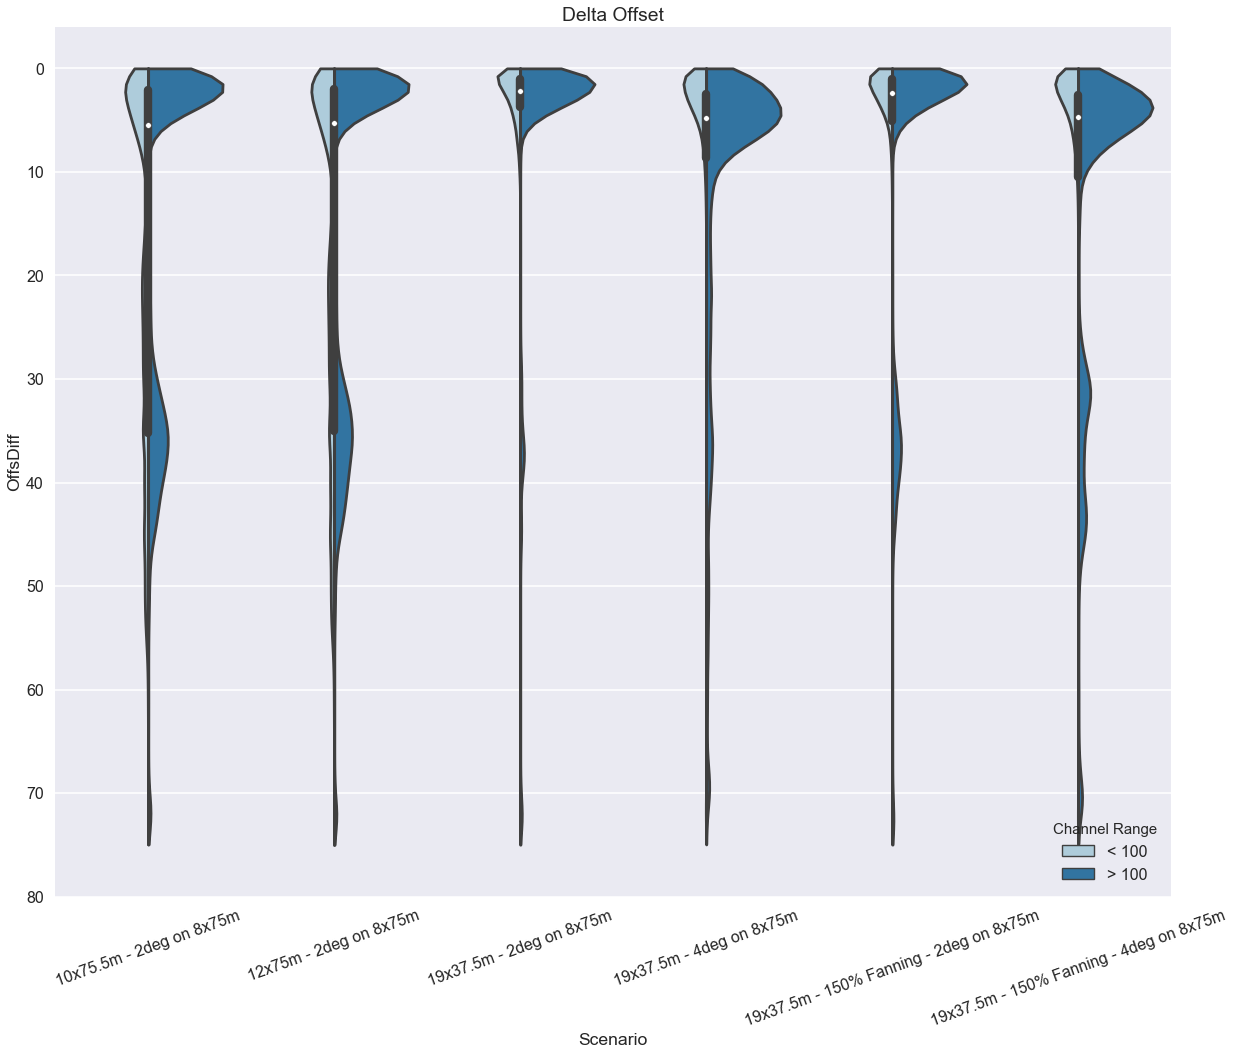

In [41]:
plot_dist(df_combined, 'OffsDiff', 80, 'Delta Offset', plttype='violin')

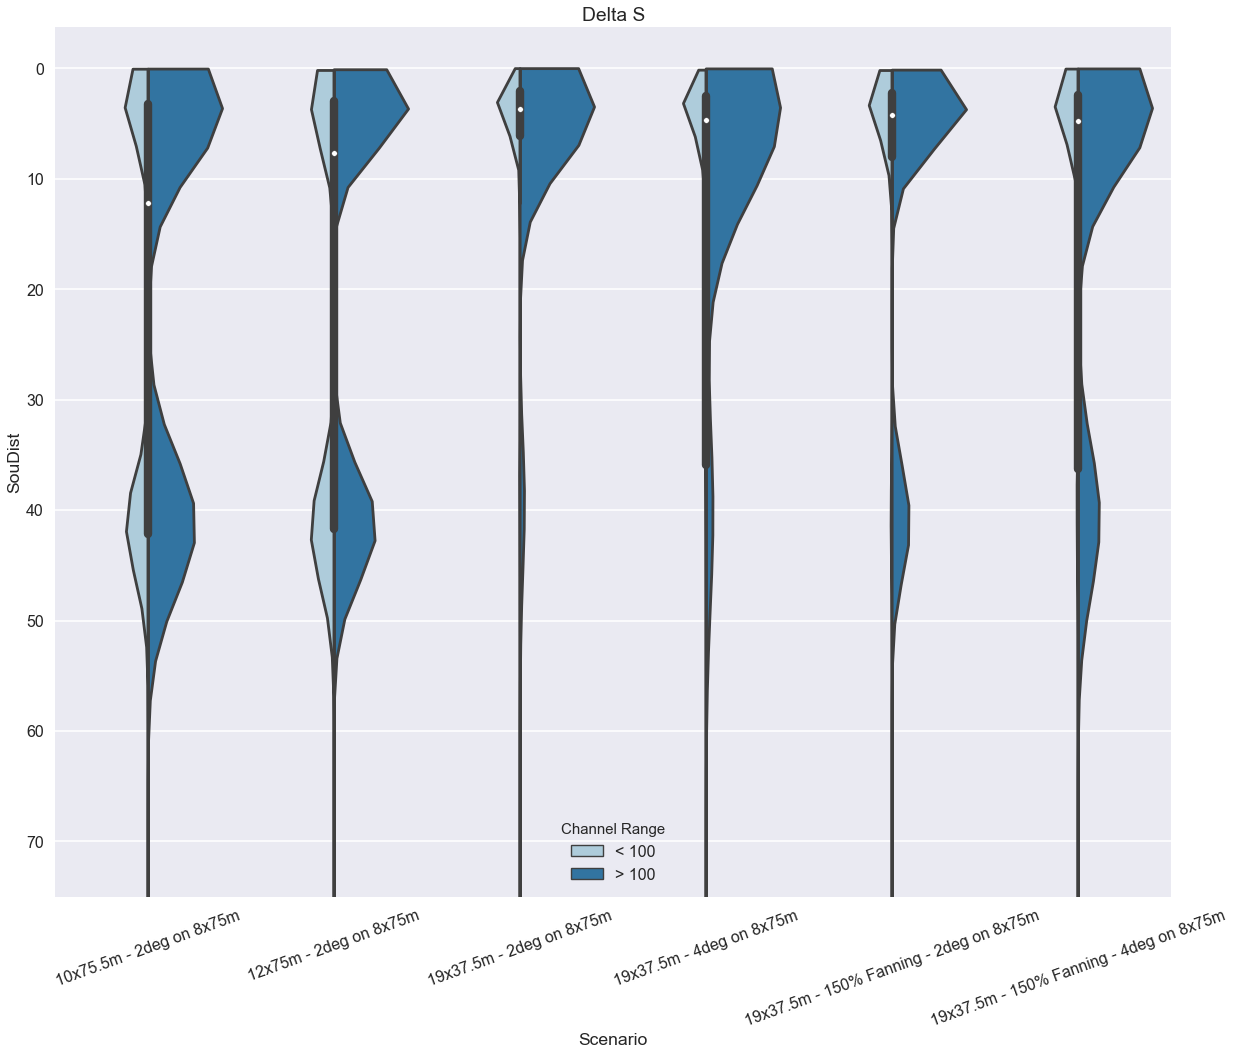

In [18]:
plot_dist(df_combined, 'SouDist', 75, 'Delta S', plttype='violin')

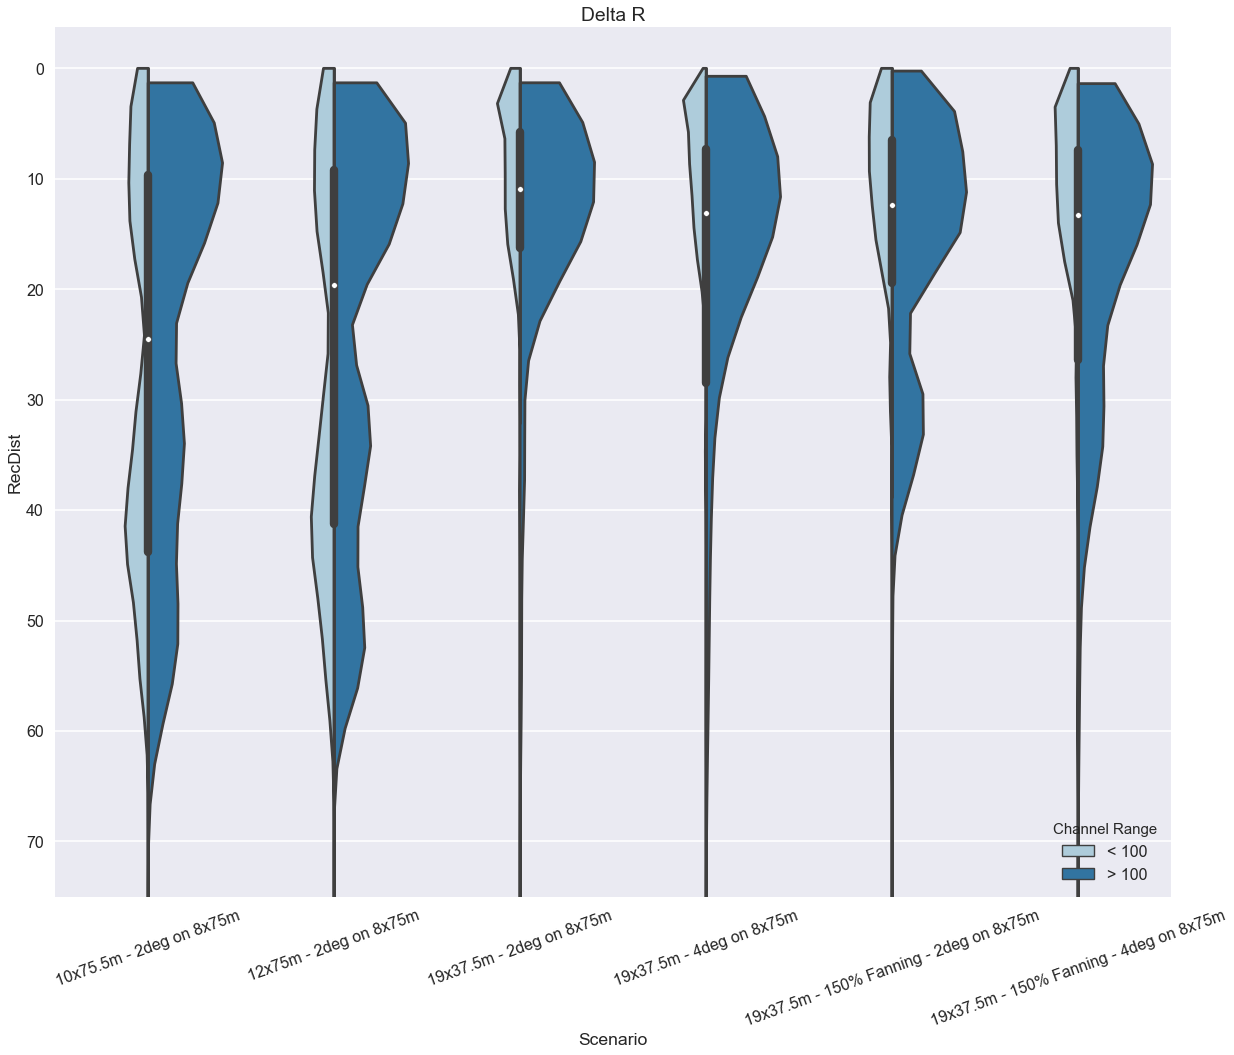

In [45]:
plot_dist(df_combined, 'RecDist', 75, 'Delta R', plttype='violin')

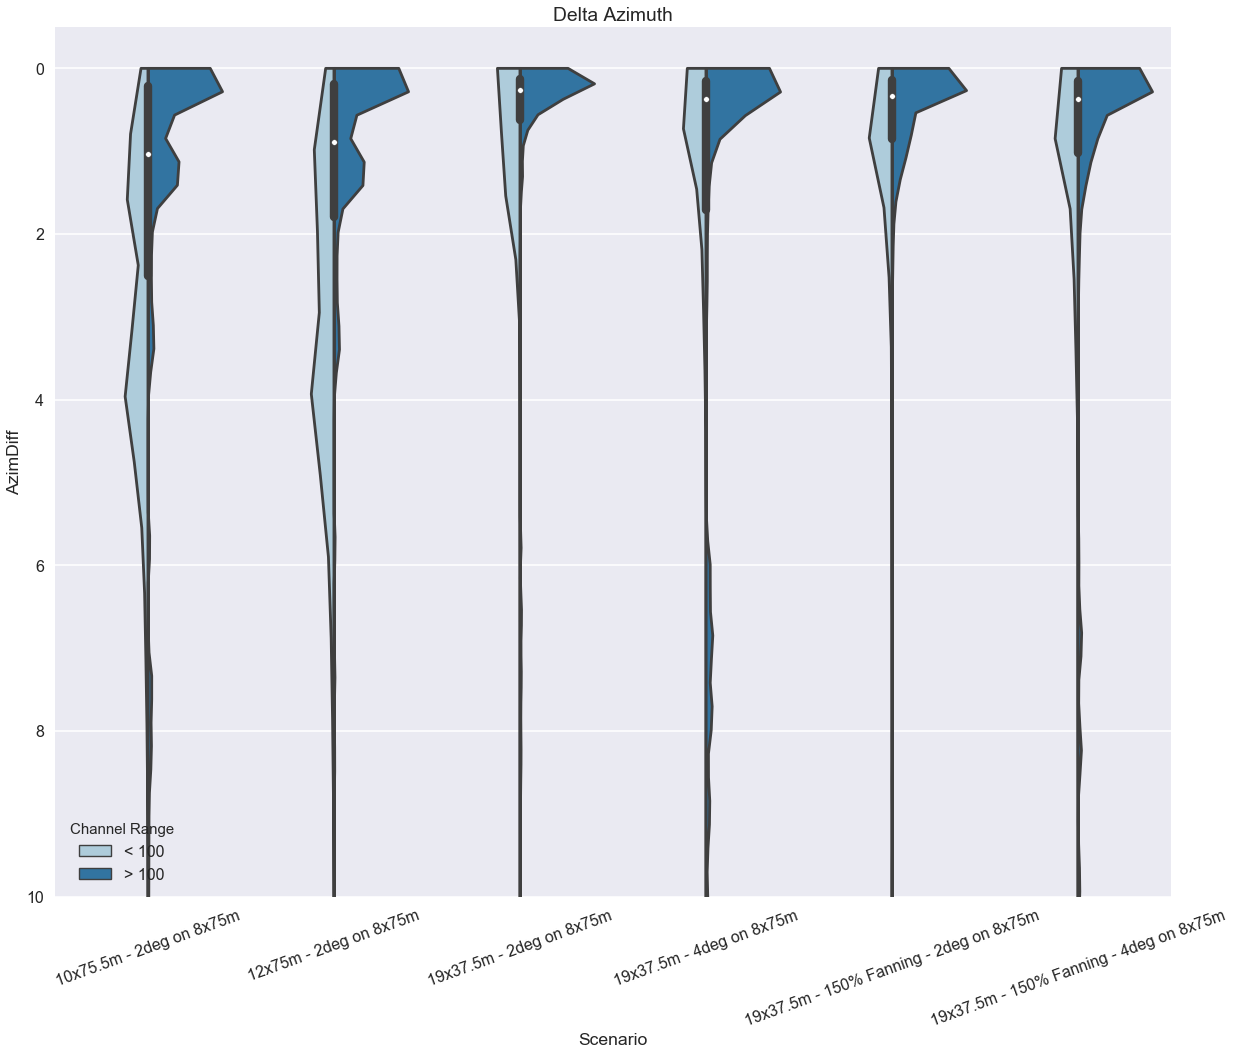

In [20]:
plot_dist(df_combined, 'AzimDiff', 10, 'Delta Azimuth', plttype='violin')

In [21]:
def make_summary(df, attribute):
    #summary = df.describe(percentiles=[0.1, 0.25, 0.5, 0.9])[['OffsDiff', 'AzimDiff', 'CMPDist', 'CMPInDist', 'CMPCrDist', 'SouDist', 'SouInDist', 'SouCrDist', 'RecDist', 'RecInDist', 'RecCrDist', 'SouRecDist']].round(decimals=1).T
    summary = df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])[[attribute]].round(decimals=1)
    #summary['Scenario'] = df[['Scenario']].iloc[0,0]
    #summary = summary.set_index([attribute])
    summary = summary.T
    summary['Scenario'] = df[['Scenario']].iloc[0,0]
    summary = summary.set_index(['Scenario']).reset_index()
    return summary

In [22]:
def makefullsummary(attribute):
    summary = make_summary(df_1, attribute)
    summary = summary.append(make_summary(df_2, attribute), ignore_index=True)
    summary = summary.append(make_summary(df_3, attribute), ignore_index=True)    
    summary = summary.append(make_summary(df_4, attribute), ignore_index=True)
    summary = summary.append(make_summary(df_5, attribute), ignore_index=True)
    summary = summary.append(make_summary(df_6, attribute), ignore_index=True)
    return summary

In [23]:
def make_heatmap(df, caption):
    cm = sns.light_palette("red", as_cmap=True)
    s = df.style.set_caption(caption).background_gradient(cmap=cm).hide_index().hide_columns(['count'])
    #s = df.style.set_caption(caption).background_gradient(cmap=cm).hide_index()
    return s
    

In [24]:
summary_offsetdiff = makefullsummary('OffsDiff')
make_heatmap(summary_offsetdiff, 'Delta Offset')

Scenario,mean,std,min,10%,25%,50%,75%,90%,max
10x75.5m - 2deg on 8x75m,18,18.3,0,0.8,2.1,5.5,35.2,41.9,75
12x75m - 2deg on 8x75m,17.9,18.2,0,0.8,2,5.3,35,42,75
19x37.5m - 2deg on 8x75m,5.9,12.5,0,0.4,1,2.2,3.8,7.9,75
19x37.5m - 4deg on 8x75m,10.6,15.1,0,1,2.4,4.7,8.7,34.8,75
19x37.5m - 150% Fanning - 2deg on 8x75m,9.5,15.4,0,0.4,1.1,2.3,5.1,37.1,75
19x37.5m - 150% Fanning - 4deg on 8x75m,12.4,16.6,0,1.1,2.5,4.7,10.5,39.3,74.9


In [25]:
summary_sourcerecdist = makefullsummary('SouRecDist')
make_heatmap(summary_sourcerecdist, 'Delta S + Delta R')

Scenario,mean,std,min,10%,25%,50%,75%,90%,max
10x75.5m - 2deg on 8x75m,82.7,139.9,0.1,7.8,13.5,33.6,85.6,99.3,710.2
12x75m - 2deg on 8x75m,60.9,96.6,0.2,7.5,12.8,24.1,83.2,95.2,714.2
19x37.5m - 2deg on 8x75m,48.7,126.7,0,6,9.4,14.7,20.2,70.8,701.5
19x37.5m - 4deg on 8x75m,126,216.5,0.2,7.7,11.2,17,68,541.6,705.5
19x37.5m - 150% Fanning - 2deg on 8x75m,36.4,79.9,0.2,6.4,10.3,16.1,24.2,74.8,705
19x37.5m - 150% Fanning - 4deg on 8x75m,71.2,152,0.1,7.6,11.2,17,65.7,86.1,708.4


In [26]:
summary_sourcedist = makefullsummary('SouDist')
make_heatmap(summary_sourcedist, 'Delta S')

Scenario,mean,std,min,10%,25%,50%,75%,90%,max
10x75.5m - 2deg on 8x75m,39.7,70.9,0.1,1.7,3.3,12.2,42.1,47.7,354
12x75m - 2deg on 8x75m,28.7,49.2,0.1,1.6,3,7.7,41.7,45.5,352
19x37.5m - 2deg on 8x75m,21.6,64.3,0,1.2,2,3.7,6.2,36.5,344.1
19x37.5m - 4deg on 8x75m,60.6,109.5,0,1.4,2.5,4.7,35.9,267.9,348.7
19x37.5m - 150% Fanning - 2deg on 8x75m,16.5,41.2,0.2,1.4,2.3,4.2,8,42,355
19x37.5m - 150% Fanning - 4deg on 8x75m,33.9,77.3,0,1.3,2.4,4.7,36.3,46.3,353.5


In [27]:
summary_recdist = makefullsummary('RecDist')
make_heatmap(summary_recdist, 'Delta R')

Scenario,mean,std,min,10%,25%,50%,75%,90%,max
10x75.5m - 2deg on 8x75m,43,69.3,0,4.1,9.6,24.5,43.8,55.8,360.6
12x75m - 2deg on 8x75m,32.2,47.9,0,4.1,9.2,19.6,41.2,52.8,365.4
19x37.5m - 2deg on 8x75m,27.1,62.6,0,2.8,5.7,11,16.3,30.6,357.4
19x37.5m - 4deg on 8x75m,65.5,107.2,0,4.3,7.3,13.1,28.5,277.4,361.1
19x37.5m - 150% Fanning - 2deg on 8x75m,19.9,39.1,0,3,6.5,12.4,19.4,33.2,362.2
19x37.5m - 150% Fanning - 4deg on 8x75m,37.3,75,0,4.4,7.4,13.2,26.4,42.6,362.9


In [28]:
summary_azmdiff = makefullsummary('AzimDiff')
make_heatmap(summary_azmdiff, 'Delta Azimuth')

Scenario,mean,std,min,10%,25%,50%,75%,90%,max
10x75.5m - 2deg on 8x75m,1.9,3.4,0,0.1,0.2,1,2.5,5,78.4
12x75m - 2deg on 8x75m,1.8,4.1,0,0.1,0.2,0.9,1.8,4,97.3
19x37.5m - 2deg on 8x75m,0.9,1.9,0,0,0.1,0.3,0.6,1.7,76.2
19x37.5m - 4deg on 8x75m,2.2,3.7,0,0.1,0.2,0.4,1.7,7.9,72.2
19x37.5m - 150% Fanning - 2deg on 8x75m,0.8,1.9,0,0.1,0.1,0.3,0.9,1.5,83.3
19x37.5m - 150% Fanning - 4deg on 8x75m,1.3,2.7,0,0.1,0.1,0.4,1,3.1,84


In [29]:
cm = sns.light_palette("green", as_cmap=True)
s = summary_sourcerecdist[['Scenario','count']].style.set_caption('Number of Traces').background_gradient(cmap=cm).hide_index()

In [30]:
s

Scenario,count
10x75.5m - 2deg on 8x75m,1.37795e+06
12x75m - 2deg on 8x75m,1.39649e+06
19x37.5m - 2deg on 8x75m,1.44226e+06
19x37.5m - 4deg on 8x75m,1.44223e+06
19x37.5m - 150% Fanning - 2deg on 8x75m,1.4211e+06
19x37.5m - 150% Fanning - 4deg on 8x75m,1.41698e+06


In [31]:
df_combined.describe()

,BasShotNo,MonShotNo,BasRecvNo,MonRecvNo,OffsDiff,AzimDiff,CMPDist,CMPInDist,CMPCrDist,SouDist,SouInDist,SouCrDist,RecDist,RecInDist,RecCrDist,SouRecDist
count,8.497010e+06,8.497010e+06,8.497010e+06,8.497010e+06,8.497010e+06,8.497009e+06,8.497010e+06,8.497010e+06,8.497010e+06,8.497010e+06,8.497010e+06,8.497010e+06,8.497010e+06,8.497010e+06,8.497010e+06,8.497010e+06
mean,1.238178e+03,1.207007e+03,1.642546e+03,3.984294e+03,1.234703e+01,1.483260e+00,5.186667e+00,4.897532e+00,1.149190e+00,3.351692e+01,3.174771e+01,6.255759e+00,3.751855e+01,3.566755e+01,6.838775e+00,7.103547e+01
std,5.332367e+02,5.348973e+02,9.749705e+02,1.876292e+03,1.670205e+01,3.128222e+00,2.775713e+00,2.928375e+00,8.510358e-01,7.372420e+01,7.370479e+01,8.899111e+00,7.195530e+01,7.207644e+01,8.441056e+00,1.454470e+02
min,4.900000e+01,4.900000e+01,1.000000e+00,3.000000e+00,1.130020e-06,0.000000e+00,3.088160e-03,0.000000e+00,0.000000e+00,2.329470e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.329470e-02
25%,6.760000e+02,6.570000e+02,7.720000e+02,2.490000e+03,1.667760e+00,1.548070e-01,2.885180e+00,2.443360e+00,4.624020e-01,2.471400e+00,1.887700e+00,6.230470e-01,7.350830e+00,6.611330e+00,1.172850e+00,1.113070e+01
50%,1.337000e+03,1.102000e+03,1.642000e+03,3.748000e+03,3.648680e+00,3.979850e-01,5.031010e+00,4.813960e+00,9.804690e-01,4.841610e+00,4.461910e+00,1.417970e+00,1.378450e+01,1.313090e+01,2.602540e+00,1.757130e+01
75%,1.800000e+03,1.560000e+03,2.512000e+03,5.450000e+03,2.200130e+01,1.302390e+00,7.291637e+00,7.143070e+00,1.677250e+00,3.823710e+01,3.316700e+01,1.667770e+01,3.131430e+01,2.367770e+01,1.529880e+01,7.188030e+01
max,2.426000e+03,2.426000e+03,3.264000e+03,7.752000e+03,7.497600e+01,9.730200e+01,3.064960e+01,3.063570e+01,1.052200e+01,3.549780e+02,3.535000e+02,1.529530e+02,3.654330e+02,3.623600e+02,1.500220e+02,7.141510e+02


In [44]:
df_3.describe().T

,count,mean,std,min,25%,50%,75%,max
BasShotNo,1442258.0,1238.234927,532.711645,4.900000e+01,676.000000,1336.000000,1800.000000,2426.00000
MonShotNo,1442258.0,1213.047100,530.605888,4.900000e+01,662.000000,1107.000000,1775.000000,2393.00000
BasRecvNo,1442258.0,1637.490541,972.847040,1.000000e+00,771.000000,1632.000000,2502.000000,3264.00000
MonRecvNo,1442258.0,4481.034494,1928.237998,2.400000e+01,2798.000000,4432.000000,6187.000000,7752.00000
OffsDiff,1442258.0,5.929771,12.476518,1.130020e-06,1.046080,2.180865,3.753270,74.97600
AzimDiff,1442257.0,0.870517,1.859348,8.537740e-07,0.122815,0.257896,0.622047,76.22350
CMPDist,1442258.0,5.105993,2.782342,3.088160e-03,2.723030,4.980570,7.272580,15.31340
CMPInDist,1442258.0,4.902707,2.902919,0.000000e+00,2.446290,4.839360,7.171880,15.30080
CMPCrDist,1442258.0,0.951981,0.665478,0.000000e+00,0.403320,0.848145,1.387210,9.20264
SouDist,1442258.0,21.603733,64.276892,2.329470e-02,2.037150,3.660830,6.159360,344.11100
